# Train Notebook

## Clone repo 

In [ ]:
!ssh-keygen

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:Od+CAjrH+OtV4lvhzg8O8PaikjGpiYqfoKu4cFVy5WI root@efd2ad6e29f7
The key's randomart image is:
+---[RSA 3072]----+
|        .        |
|       o         |
|    . E .        |
|     = . .       |
|   .+ . S        |
|  += = + = .     |
|+o=+o B = o .    |
|Ooo= o.X . .     |
|@+oo=o..=..      |
+----[SHA256]-----+


In [ ]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABgQD1/pP/guIFdTVDuqsy/YvPg3Bb/dLpn7MXkAyE8FpH/yzZWxDOk0KuzPeGboBA0m3lytRgD013zndmyVidww3I53wvI32VR8/3jiSZ3H6OnFMKA2RCcHMd/MfUOYFbDFO3Aq6SDWf/TZpHUz136ZP75IxOlqUrkgmp4bDGT4ZPVt5gGcfmt/Wsrlnv4Wb5qM4PqeFtzDQhz9QKy1P6nWmwuoVCFSK9tsBHhwfb9EVPmJ4OUQHYxshele0DiA5N1NZQlmR8lO/7pb4vxKBRgTOklwXQNURzwYl4o1SDFjvM9j7TalOZPT49tT8tpP+4i+pW3g87k19PKdfRLNXJNn6QqyKYv0Kw/kCl6rYJunmM7o+faAq5DjsOt+N3LoYtwwddJO4WQAmE62NGRxUzsHhfROtkkxHI1WOd3RXwtB0cc8CKFnMtAdkoaeyGIUm2tazOoEi//tVrWYj9pwMN4lK7Mugl7LRskcw0eWyCRq6MVGrNRsDC6bjKId5n3SzSthM= root@efd2ad6e29f7


In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!ssh -T git@github.com

# github.com:22 SSH-2.0-babeld-7e018303
Hi abdelrahmanabdelghany! You've successfully authenticated, but GitHub does not provide shell access.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Mabrains

/content/drive/MyDrive/Mabrains


In [ ]:
!git clone -b training git@github.com:abdelrahmanabdelghany/Mabrains-Task-Transistor-Drain-Current-Prediction.git

Cloning into 'Mabrains-Task-Transistor-Drain-Current-Prediction'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 113 (delta 61), reused 88 (delta 39), pack-reused 0
Receiving objects: 100% (113/113), 11.78 MiB | 7.56 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Updating files: 100% (10/10), done.


In [7]:
%cd /content/drive/MyDrive/Mabrains-Task-Transistor-Drain-Current-Prediction

/content/drive/.shortcut-targets-by-id/12jcTFjexElDdtLbONpHiPaM52BvDfZbj/Mabrains-Task-Transistor-Drain-Current-Prediction


## Imports

In [8]:
pip install torchmetrics

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from utils.dataset import Transistor_dataset
from utils.models import FCDN
from utils.train import Trainer
from utils.helpers import *
import torch
import torch.nn as nn
from torch.utils.data import DataLoader ,random_split
from torchmetrics.regression import MeanAbsolutePercentageError
import numpy as np
import torch.optim.lr_scheduler as lr_scheduler

## set parameters

In [11]:
input_shape = 6
output_shape = 1
batch_size = 256
epochs = 50
lr=1e-2

## Load data 

In [12]:
train_dataset=Transistor_dataset('data/train_data.csv')
test_dataset=Transistor_dataset('data/test_data.csv',test_transform=test_datset_transforms)
valid_dataset=Transistor_dataset('data/val_data.csv')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)


## Load Model

In [13]:
model = FCDN(model_name='FCDN_LeakReLU_256_batchnorm_linear',input_shape=input_shape, output_shape=output_shape,activation=nn.LeakyReLU(),device='cuda')
loss_fn = MAPE_loss
accuracy = MeanAbsolutePercentageError().to('cuda')
optimizer = torch.optim.RMSprop(model.parameters(),lr=lr)
scheduler = lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.01, total_iters=40)
trainer = Trainer(model=model, loss_fn=loss_fn, optimizer=optimizer,scheduler=scheduler,accuracy=accuracy,patience=10, device='cuda')

/content/drive/.shortcut-targets-by-id/12jcTFjexElDdtLbONpHiPaM52BvDfZbj/Mabrains-Task-Transistor-Drain-Current-Prediction/utils/models.py:64: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


## Start training

In [14]:
history=trainer.train(train_loader=train_loader,val_loader=valid_loader,epochs=epochs)

Training Started


epoch 1 batch_loss 0.15535: 100%|██████████| 3064/3064 [02:37<00:00, 19.46it/s]


Epoch 1 Train_Loss 0.33784
Epoch 1: lr 0.010000 -> 0.009752


100%|██████████| 307/307 [00:14<00:00, 21.26it/s]


Epoch 1 Val_Loss 0.22118
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 2 batch_loss 0.16193: 100%|██████████| 3064/3064 [02:37<00:00, 19.44it/s]


Epoch 2 Train_Loss 0.19253
Epoch 2: lr 0.009752 -> 0.009505


100%|██████████| 307/307 [00:14<00:00, 21.15it/s]


Epoch 2 Val_Loss 0.20075
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 3 batch_loss 0.13352: 100%|██████████| 3064/3064 [02:36<00:00, 19.58it/s]


Epoch 3 Train_Loss 0.16268
Epoch 3: lr 0.009505 -> 0.009258


100%|██████████| 307/307 [00:13<00:00, 22.64it/s]


Epoch 3 Val_Loss 0.25179
Trigger Times: 1


epoch 4 batch_loss 0.09471: 100%|██████████| 3064/3064 [02:26<00:00, 20.85it/s]


Epoch 4 Train_Loss 0.14670
Epoch 4: lr 0.009258 -> 0.009010


100%|██████████| 307/307 [00:15<00:00, 19.63it/s]


Epoch 4 Val_Loss 0.16244
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 5 batch_loss 0.14211: 100%|██████████| 3064/3064 [02:27<00:00, 20.84it/s]


Epoch 5 Train_Loss 0.14109
Epoch 5: lr 0.009010 -> 0.008763


100%|██████████| 307/307 [00:13<00:00, 22.93it/s]


Epoch 5 Val_Loss 0.09357
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 6 batch_loss 0.10092: 100%|██████████| 3064/3064 [02:30<00:00, 20.38it/s]


Epoch 6 Train_Loss 0.13768
Epoch 6: lr 0.008763 -> 0.008515


100%|██████████| 307/307 [00:13<00:00, 22.54it/s]


Epoch 6 Val_Loss 0.09156
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 7 batch_loss 0.12435: 100%|██████████| 3064/3064 [02:29<00:00, 20.52it/s]


Epoch 7 Train_Loss 0.13372
Epoch 7: lr 0.008515 -> 0.008268


100%|██████████| 307/307 [00:15<00:00, 19.50it/s]


Epoch 7 Val_Loss 0.05994
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 8 batch_loss 0.21019: 100%|██████████| 3064/3064 [02:35<00:00, 19.70it/s]


Epoch 8 Train_Loss 0.12953
Epoch 8: lr 0.008268 -> 0.008020


100%|██████████| 307/307 [00:16<00:00, 18.75it/s]


Epoch 8 Val_Loss 0.07267
Trigger Times: 1


epoch 9 batch_loss 0.17599: 100%|██████████| 3064/3064 [02:35<00:00, 19.74it/s]


Epoch 9 Train_Loss 0.12730
Epoch 9: lr 0.008020 -> 0.007773


100%|██████████| 307/307 [00:14<00:00, 21.51it/s]


Epoch 9 Val_Loss 0.08377
Trigger Times: 2


epoch 10 batch_loss 0.09669: 100%|██████████| 3064/3064 [02:35<00:00, 19.73it/s]


Epoch 10 Train_Loss 0.12487
Epoch 10: lr 0.007773 -> 0.007525


100%|██████████| 307/307 [00:14<00:00, 21.85it/s]


Epoch 10 Val_Loss 0.09861
Trigger Times: 3


epoch 11 batch_loss 0.20825: 100%|██████████| 3064/3064 [02:35<00:00, 19.69it/s]


Epoch 11 Train_Loss 0.12346
Epoch 11: lr 0.007525 -> 0.007278


100%|██████████| 307/307 [00:14<00:00, 21.77it/s]


Epoch 11 Val_Loss 0.08595
Trigger Times: 4


epoch 12 batch_loss 0.15646: 100%|██████████| 3064/3064 [02:35<00:00, 19.66it/s]


Epoch 12 Train_Loss 0.11985
Epoch 12: lr 0.007278 -> 0.007030


100%|██████████| 307/307 [00:14<00:00, 21.56it/s]


Epoch 12 Val_Loss 0.05272
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 13 batch_loss 0.10797: 100%|██████████| 3064/3064 [02:32<00:00, 20.14it/s]


Epoch 13 Train_Loss 0.12067
Epoch 13: lr 0.007030 -> 0.006782


100%|██████████| 307/307 [00:15<00:00, 19.24it/s]


Epoch 13 Val_Loss 0.08019
Trigger Times: 1


epoch 14 batch_loss 0.14082: 100%|██████████| 3064/3064 [02:32<00:00, 20.11it/s]


Epoch 14 Train_Loss 0.11885
Epoch 14: lr 0.006782 -> 0.006535


100%|██████████| 307/307 [00:14<00:00, 21.51it/s]


Epoch 14 Val_Loss 0.05773
Trigger Times: 2


epoch 15 batch_loss 0.08583: 100%|██████████| 3064/3064 [02:33<00:00, 19.91it/s]


Epoch 15 Train_Loss 0.11875
Epoch 15: lr 0.006535 -> 0.006287


100%|██████████| 307/307 [00:13<00:00, 22.23it/s]


Epoch 15 Val_Loss 0.09615
Trigger Times: 3


epoch 16 batch_loss 0.10463: 100%|██████████| 3064/3064 [02:33<00:00, 19.91it/s]


Epoch 16 Train_Loss 0.11452
Epoch 16: lr 0.006287 -> 0.006040


100%|██████████| 307/307 [00:13<00:00, 22.17it/s]


Epoch 16 Val_Loss 0.06366
Trigger Times: 4


epoch 17 batch_loss 0.10467: 100%|██████████| 3064/3064 [02:32<00:00, 20.06it/s]


Epoch 17 Train_Loss 0.11144
Epoch 17: lr 0.006040 -> 0.005792


100%|██████████| 307/307 [00:16<00:00, 19.13it/s]


Epoch 17 Val_Loss 0.06939
Trigger Times: 5


epoch 18 batch_loss 0.10507: 100%|██████████| 3064/3064 [02:30<00:00, 20.41it/s]


Epoch 18 Train_Loss 0.11248
Epoch 18: lr 0.005792 -> 0.005545


100%|██████████| 307/307 [00:13<00:00, 22.16it/s]


Epoch 18 Val_Loss 0.04563
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 19 batch_loss 0.06788: 100%|██████████| 3064/3064 [02:35<00:00, 19.72it/s]


Epoch 19 Train_Loss 0.11016
Epoch 19: lr 0.005545 -> 0.005297


100%|██████████| 307/307 [00:13<00:00, 22.30it/s]


Epoch 19 Val_Loss 0.07151
Trigger Times: 1


epoch 20 batch_loss 0.08348: 100%|██████████| 3064/3064 [02:34<00:00, 19.83it/s]


Epoch 20 Train_Loss 0.10840
Epoch 20: lr 0.005297 -> 0.005050


100%|██████████| 307/307 [00:13<00:00, 22.91it/s]


Epoch 20 Val_Loss 0.05433
Trigger Times: 2


epoch 21 batch_loss 0.07838: 100%|██████████| 3064/3064 [02:33<00:00, 19.95it/s]


Epoch 21 Train_Loss 0.10865
Epoch 21: lr 0.005050 -> 0.004802


100%|██████████| 307/307 [00:13<00:00, 22.03it/s]


Epoch 21 Val_Loss 0.04904
Trigger Times: 3


epoch 22 batch_loss 0.06626: 100%|██████████| 3064/3064 [02:32<00:00, 20.15it/s]


Epoch 22 Train_Loss 0.10788
Epoch 22: lr 0.004802 -> 0.004555


100%|██████████| 307/307 [00:16<00:00, 18.85it/s]


Epoch 22 Val_Loss 0.04106
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 23 batch_loss 0.17031: 100%|██████████| 3064/3064 [02:32<00:00, 20.15it/s]


Epoch 23 Train_Loss 0.10716
Epoch 23: lr 0.004555 -> 0.004307


100%|██████████| 307/307 [00:14<00:00, 21.88it/s]


Epoch 23 Val_Loss 0.07276
Trigger Times: 1


epoch 24 batch_loss 0.13244: 100%|██████████| 3064/3064 [02:35<00:00, 19.66it/s]


Epoch 24 Train_Loss 0.10593
Epoch 24: lr 0.004307 -> 0.004060


100%|██████████| 307/307 [00:13<00:00, 21.94it/s]


Epoch 24 Val_Loss 0.04831
Trigger Times: 2


epoch 25 batch_loss 0.14072: 100%|██████████| 3064/3064 [02:30<00:00, 20.42it/s]


Epoch 25 Train_Loss 0.10474
Epoch 25: lr 0.004060 -> 0.003812


100%|██████████| 307/307 [00:13<00:00, 23.30it/s]


Epoch 25 Val_Loss 0.04933
Trigger Times: 3


epoch 26 batch_loss 0.06122: 100%|██████████| 3064/3064 [02:25<00:00, 21.00it/s]


Epoch 26 Train_Loss 0.10424
Epoch 26: lr 0.003812 -> 0.003565


100%|██████████| 307/307 [00:15<00:00, 19.89it/s]


Epoch 26 Val_Loss 0.07367
Trigger Times: 4


epoch 27 batch_loss 0.06298: 100%|██████████| 3064/3064 [02:24<00:00, 21.13it/s]


Epoch 27 Train_Loss 0.10375
Epoch 27: lr 0.003565 -> 0.003317


100%|██████████| 307/307 [00:13<00:00, 22.70it/s]


Epoch 27 Val_Loss 0.03352
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 28 batch_loss 0.03304: 100%|██████████| 3064/3064 [02:27<00:00, 20.82it/s]


Epoch 28 Train_Loss 0.10176
Epoch 28: lr 0.003317 -> 0.003070


100%|██████████| 307/307 [00:13<00:00, 22.69it/s]


Epoch 28 Val_Loss 0.04332
Trigger Times: 1


epoch 29 batch_loss 0.11715: 100%|██████████| 3064/3064 [02:31<00:00, 20.28it/s]


Epoch 29 Train_Loss 0.09980
Epoch 29: lr 0.003070 -> 0.002822


100%|██████████| 307/307 [00:16<00:00, 19.18it/s]


Epoch 29 Val_Loss 0.04873
Trigger Times: 2


epoch 30 batch_loss 0.07299: 100%|██████████| 3064/3064 [02:31<00:00, 20.17it/s]


Epoch 30 Train_Loss 0.10095
Epoch 30: lr 0.002822 -> 0.002575


100%|██████████| 307/307 [00:13<00:00, 22.02it/s]


Epoch 30 Val_Loss 0.05588
Trigger Times: 3


epoch 31 batch_loss 0.11269: 100%|██████████| 3064/3064 [02:35<00:00, 19.69it/s]


Epoch 31 Train_Loss 0.10056
Epoch 31: lr 0.002575 -> 0.002327


100%|██████████| 307/307 [00:13<00:00, 22.06it/s]


Epoch 31 Val_Loss 0.05624
Trigger Times: 4


epoch 32 batch_loss 0.15058: 100%|██████████| 3064/3064 [02:33<00:00, 19.90it/s]


Epoch 32 Train_Loss 0.09813
Epoch 32: lr 0.002327 -> 0.002080


100%|██████████| 307/307 [00:14<00:00, 21.62it/s]


Epoch 32 Val_Loss 0.03735
Trigger Times: 5


epoch 33 batch_loss 0.09250: 100%|██████████| 3064/3064 [02:32<00:00, 20.08it/s]


Epoch 33 Train_Loss 0.09861
Epoch 33: lr 0.002080 -> 0.001832


100%|██████████| 307/307 [00:14<00:00, 21.69it/s]


Epoch 33 Val_Loss 0.04519
Trigger Times: 6


epoch 34 batch_loss 0.04912: 100%|██████████| 3064/3064 [02:32<00:00, 20.05it/s]


Epoch 34 Train_Loss 0.09688
Epoch 34: lr 0.001832 -> 0.001585


100%|██████████| 307/307 [00:16<00:00, 19.18it/s]


Epoch 34 Val_Loss 0.05874
Trigger Times: 7


epoch 35 batch_loss 0.07181: 100%|██████████| 3064/3064 [02:31<00:00, 20.23it/s]


Epoch 35 Train_Loss 0.09596
Epoch 35: lr 0.001585 -> 0.001337


100%|██████████| 307/307 [00:13<00:00, 22.14it/s]


Epoch 35 Val_Loss 0.04081
Trigger Times: 8


epoch 36 batch_loss 0.14415: 100%|██████████| 3064/3064 [02:34<00:00, 19.87it/s]


Epoch 36 Train_Loss 0.09538
Epoch 36: lr 0.001337 -> 0.001090


100%|██████████| 307/307 [00:13<00:00, 22.27it/s]


Epoch 36 Val_Loss 0.05555
Trigger Times: 9


epoch 37 batch_loss 0.05469: 100%|██████████| 3064/3064 [02:33<00:00, 19.96it/s]


Epoch 37 Train_Loss 0.09427
Epoch 37: lr 0.001090 -> 0.000842


100%|██████████| 307/307 [00:13<00:00, 22.63it/s]


Epoch 37 Val_Loss 0.02947
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 38 batch_loss 0.04571: 100%|██████████| 3064/3064 [02:31<00:00, 20.21it/s]


Epoch 38 Train_Loss 0.09442
Epoch 38: lr 0.000842 -> 0.000595


100%|██████████| 307/307 [00:15<00:00, 19.40it/s]


Epoch 38 Val_Loss 0.04682
Trigger Times: 1


epoch 39 batch_loss 0.08643: 100%|██████████| 3064/3064 [02:31<00:00, 20.23it/s]


Epoch 39 Train_Loss 0.09565
Epoch 39: lr 0.000595 -> 0.000347


100%|██████████| 307/307 [00:14<00:00, 21.88it/s]


Epoch 39 Val_Loss 0.02738
trigger times: 0
Model saved to saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth
trigger times: 0


epoch 40 batch_loss 0.04531: 100%|██████████| 3064/3064 [02:34<00:00, 19.89it/s]


Epoch 40 Train_Loss 0.09442
Epoch 40: lr 0.000347 -> 0.000100


100%|██████████| 307/307 [00:14<00:00, 21.90it/s]


Epoch 40 Val_Loss 0.04972
Trigger Times: 1


epoch 41 batch_loss 0.09695: 100%|██████████| 3064/3064 [02:35<00:00, 19.76it/s]


Epoch 41 Train_Loss 0.09068
Epoch 41: lr 0.000100 -> 0.000100


100%|██████████| 307/307 [00:14<00:00, 21.70it/s]


Epoch 41 Val_Loss 0.03846
Trigger Times: 2


epoch 42 batch_loss 0.11266: 100%|██████████| 3064/3064 [02:35<00:00, 19.67it/s]


Epoch 42 Train_Loss 0.09109
Epoch 42: lr 0.000100 -> 0.000100


100%|██████████| 307/307 [00:14<00:00, 21.30it/s]


Epoch 42 Val_Loss 0.03274
Trigger Times: 3


epoch 43 batch_loss 0.19407: 100%|██████████| 3064/3064 [02:34<00:00, 19.87it/s]


Epoch 43 Train_Loss 0.09275
Epoch 43: lr 0.000100 -> 0.000100


100%|██████████| 307/307 [00:16<00:00, 18.89it/s]


Epoch 43 Val_Loss 0.04799
Trigger Times: 4


epoch 44 batch_loss 0.13748: 100%|██████████| 3064/3064 [02:34<00:00, 19.85it/s]


Epoch 44 Train_Loss 0.09330
Epoch 44: lr 0.000100 -> 0.000100


100%|██████████| 307/307 [00:14<00:00, 21.63it/s]


Epoch 44 Val_Loss 0.03637
Trigger Times: 5


epoch 45 batch_loss 0.10533: 100%|██████████| 3064/3064 [02:37<00:00, 19.46it/s]


Epoch 45 Train_Loss 0.08959
Epoch 45: lr 0.000100 -> 0.000100


100%|██████████| 307/307 [00:13<00:00, 22.20it/s]


Epoch 45 Val_Loss 0.04956
Trigger Times: 6


epoch 46 batch_loss 0.07233: 100%|██████████| 3064/3064 [02:33<00:00, 19.99it/s]


Epoch 46 Train_Loss 0.09239
Epoch 46: lr 0.000100 -> 0.000100


100%|██████████| 307/307 [00:13<00:00, 22.57it/s]


Epoch 46 Val_Loss 0.04933
Trigger Times: 7


epoch 47 batch_loss 0.14095: 100%|██████████| 3064/3064 [02:27<00:00, 20.80it/s]


Epoch 47 Train_Loss 0.09285
Epoch 47: lr 0.000100 -> 0.000100


100%|██████████| 307/307 [00:15<00:00, 19.75it/s]


Epoch 47 Val_Loss 0.04514
Trigger Times: 8


epoch 48 batch_loss 0.12123: 100%|██████████| 3064/3064 [02:27<00:00, 20.82it/s]


Epoch 48 Train_Loss 0.09236
Epoch 48: lr 0.000100 -> 0.000100


100%|██████████| 307/307 [00:13<00:00, 22.52it/s]


Epoch 48 Val_Loss 0.06021
Trigger Times: 9


epoch 49 batch_loss 0.17905: 100%|██████████| 3064/3064 [02:27<00:00, 20.76it/s]


Epoch 49 Train_Loss 0.09227
Epoch 49: lr 0.000100 -> 0.000100


100%|██████████| 307/307 [00:13<00:00, 22.69it/s]

Epoch 49 Val_Loss 0.04506
Trigger Times: 10
Early stopping!


## Visualize loss

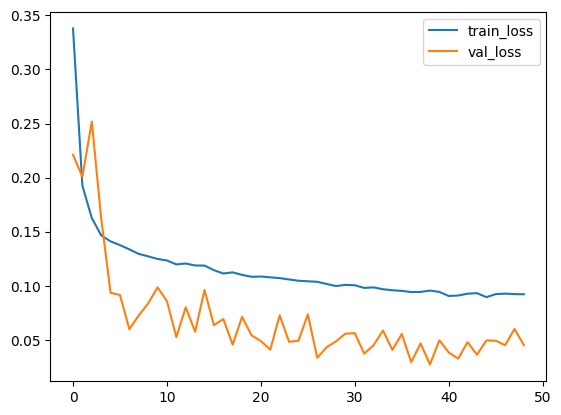

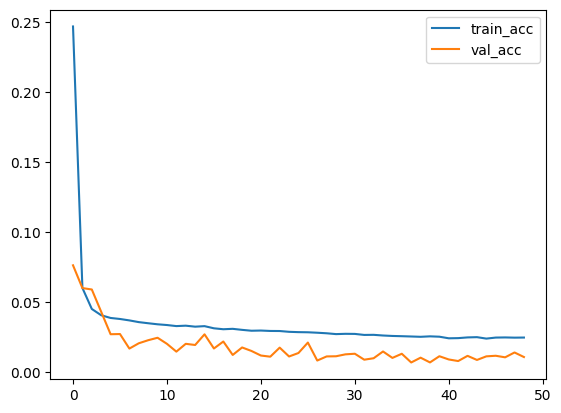

Plots saved


In [15]:
visualize_history_loss_acc(history=history,model_name=model.model_name)

## Load best model

In [16]:
model.load(PATH='saved_models/'+model.model_name+'.pth')

Model loaded from saved_models/FCDN_LeakReLU_256_batchnorm_linear.pth


## Test model

In [17]:
predictions=None
labels=None
for batch in test_loader:
    Featurs,labels = batch['features'].to(device='cuda',dtype=torch.float),batch['labels'].to(device='cuda',dtype=torch.float)
    predictions=trainer.test(x=Featurs,y=labels)
    break


Test_Accuracy 0.03


In [18]:
def marginal_acc(y_pred,labels,margin=0.05):
    """
    Calculates marginal accuracy.

    Arguments:
        y_pred: predicted values
        labels: actual values
        margin: margin to be considered.

    Returns:
        Marginal accuracy.
    """
    y_pred=10**y_pred
    labels=10**labels
    return torch.mean((torch.abs((y_pred-labels)/labels)<margin).float())
marginal_acc(predictions,labels,margin=0.1)

tensor(0.9776, device='cuda:0')

## Visualize Outputs

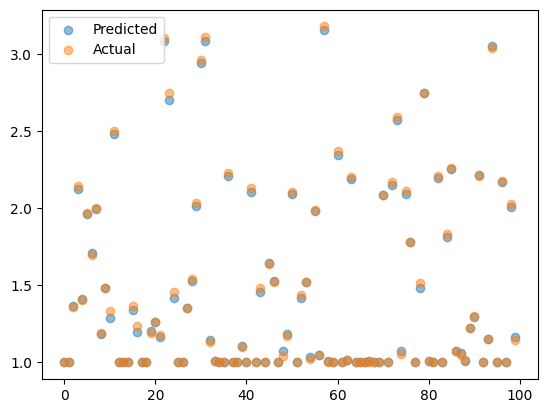

In [19]:
x=np.arange(0,50)
visualize_data(predictions[:100],labels[:100])

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
def animated_visualization(predictions,labels):
    # Generate random data for demonstration


    n = len(predictions)
    step=50
    x = np.linspace(0, n, n)
    y_labels=10**(labels.detach().cpu().numpy())-10
    y_predictions=10**(predictions.detach().cpu().numpy())-10

    # Create the initial scatter plot
    fig, ax = plt.subplots()
    scatter1=ax.scatter(x[:step], y_labels[:step],  alpha=0.5)
    scatter2=ax.scatter(x[:step], y_predictions[:step],  alpha=0.5)


    # Set the axis limits
    ax.set_xlim(0, step)
    ax.set_ylim(0, y_labels[:step].max()+1)

    # Function to update the scatter plot at each frame
    def update(frame):
        # Generate new data for each frame (you can replace this with your own data)
        new_x =x[frame*10:frame*10+step]
        new_y_labels = y_labels[frame*10:frame*10+step]
        new_y_predictions = y_predictions[frame*10:frame*10+step]
        scatter1.set_offsets(np.column_stack((new_x, new_y_labels)))
        scatter2.set_offsets(np.column_stack((new_x, new_y_predictions)))
        # Update the axis limits (for example, zoom in)
        x_margin = 0.1  # Margin to keep some space around the data
        y_margin = 0.1
        x_min = min(new_x) - x_margin
        x_max = max(new_x) + x_margin
        y_min = min(new_y_labels) - y_margin
        y_max = max(new_y_labels) + y_margin
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)

    # Create the animation
    ani = FuncAnimation(fig, update, frames=300, interval=200)
    ani.save('animated_results/'+model.model_name+'_testset_animated_scatter.mp4', writer='ffmpeg', fps=60)
    return ani

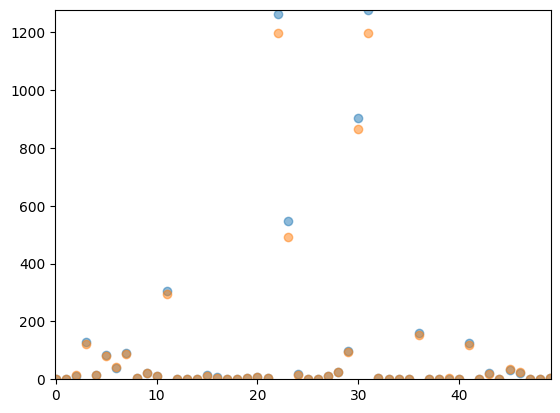

In [21]:
ani=animated_visualization(predictions,labels)
# Display the animation in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())